In [1]:
%matplotlib notebook
from CG import *

In [2]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

## 4. The Method of Steepest Descent <a id="4"></a>

In the method of Steepest Descent, we start at an arbitrary point $x_{[0]}$ and slide down to the bottom of the paraboloid. We take a series of steps $x_{[1]}, x_{[2]}, \dots$ until we are satisfied that we are close enough to the solution $x$.

When we take a step, we choose the direction in which $f$ decreases most quickly, which is the direction opposite $f'(x_{[i]})$. According to Equation 7, this direction is $-f'(x_{[i]}) =  b - Ax_{[i]}$.

Allow me to introduce a few definitions, which you should memorize. The *error* $e_{[i]} = x_{[i]} - x$ is a vector that indicates how far we are from the solution. The *residual* $r_{[i]} = b - Ax_{[i]}$ indicates how far we are from the correct value of $b$. It is easy to see that $r_{[i]} = -Ae_{[i]}$, and you should think of the residual as being the error transformed by $A$ into the same space as $b$. More importantly, $r_{[i]} = -f'(x_{[i]})$, and you should also think of the residual as the direction of steepest descent. For nonlinear problems, discussed in Section 14, only the latter definition applies. So remember, whenever you read “residual”, think “direction of steepest descent.”

Suppose we start at $x_{[0]} = [-2, -2]^T$. Our first step, along the direction of steepest descent, will fall somewhere on the solid line in Figure 6(a). In other words, we will choose a point

\begin{equation}
x_{[1]} = x_{[0]} + \alpha r \tag{9}
\end{equation}

The question is, how big a step should we take?

A line search is a procedure that chooses $\alpha$ to minimize $f$ along a line. Figure 6(b) illustrates this task: we are restricted to choosing a point on the intersection of a vertical plane in direction $r$ and the paraboloid. Figure 6(c) is the parabola defined by the intersection of these surfaces. What is the value of at the base of the parabola?

From basic calculus, $\alpha$ minimizes $f$ when the *directional derivative* $\frac{\partial}{\partial \alpha}f(x_{[1]})$ is equal to zero. By the chain rule, $\frac{\partial}{\partial \alpha}f(x_{[1]}) = f'(x_{[1]})^T\frac{\partial}{\partial \alpha}x_{[1]} = f'(x_{[1]})^Tr_{[0]}$ Setting this expression to zero, we find that $\alpha$ should be chosen so that $r_{[0]}$ and $f'(x_{[1]})$ are orthogonal (see Figure 6(d)).

<IPython.core.display.Javascript object>


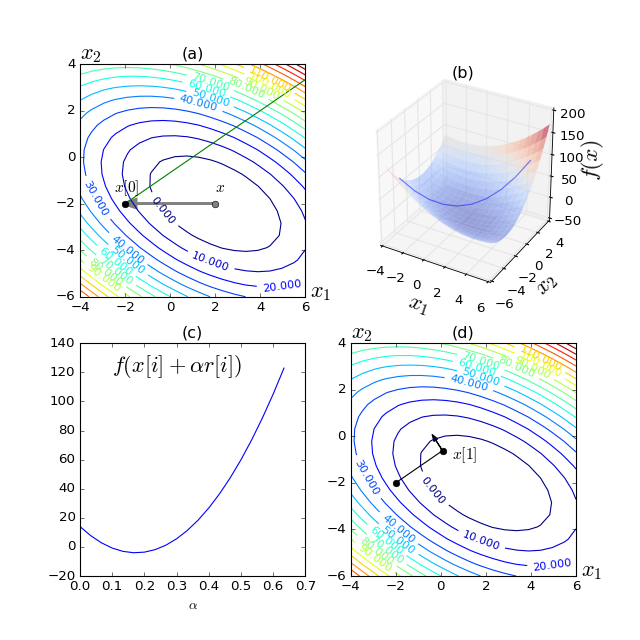

In [3]:
fig6(A, b, c)

<center>Figure 6: The method of Steepest Descent. (a) Starting at $[-2, -2]^T$, take a step in the direction of steepest descent of $f$. (b) Find the point on surface along the line with direction $r$ that minimizes $f$. (c) This parabola is the intersection of surfaces. The bottommost point is our target. (d) The gradient at the bottommost point is orthogonal to the gradient of the previous step.</center>

There is an intuitive reason why we should expect these vectors to be orthogonal at the minimum. Figure 7 shows the gradient vectors at various points along the search line. The slope of the parabola (Figure 6(c)) at any point is equal to the magnitude of the projection of the gradient onto the line (Figure 7, dotted arrows). These projections represent the rate of increase of $f$ as one traverses the search line. $f$ is minimized where the projection is zero — where the gradient is orthogonal to the search line.

<IPython.core.display.Javascript object>


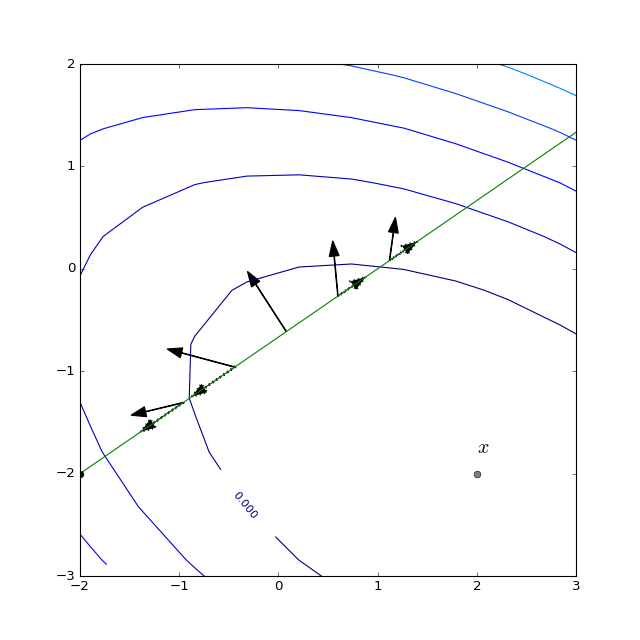

In [4]:
fig7(A, b, c)

<center>Figure 7: The gradient $f'$ is shown at several locations along the search line (solid arrows). Each gradient’s projection onto the line is also shown (dotted arrows). The gradient vectors represent the direction of steepest increase of $f$, and the projections represent the rate of increase as one traverses the search line. On the search line, $f$ is minimized where the gradient is orthogonal to the search line.</center>

To determine $\alpha$, note that $f'(x_{[1]}) = -r_{[1]}$, and we have

\begin{align*}
r_{[1]}^T r_{[0]} &= 0 \\
(b - Ax_{[1]})^T r_{[0]} &= 0 \\
(b - A(x_{[0]} + \alpha r_{[0]}))^T r_{[0]} &= 0 \\
(b - Ax_{[0]})^T r_{[0]} - \alpha (Ar_{[0]})^T r_{[0]} &= 0 \\
(b - Ax_{[0]})^T r_{[0]} &= \alpha (Ar_{[0]})^T r_{[0]} \\
r_{[0]}^T r_{[0]} &= \alpha r_{[0]}^T (Ar_{[0]}) \\
\alpha = \frac{r_{[0]}^T r_{[0]}}{r_{[0]}^T (Ar_{[0]})}.
\end{align*}

<IPython.core.display.Javascript object>


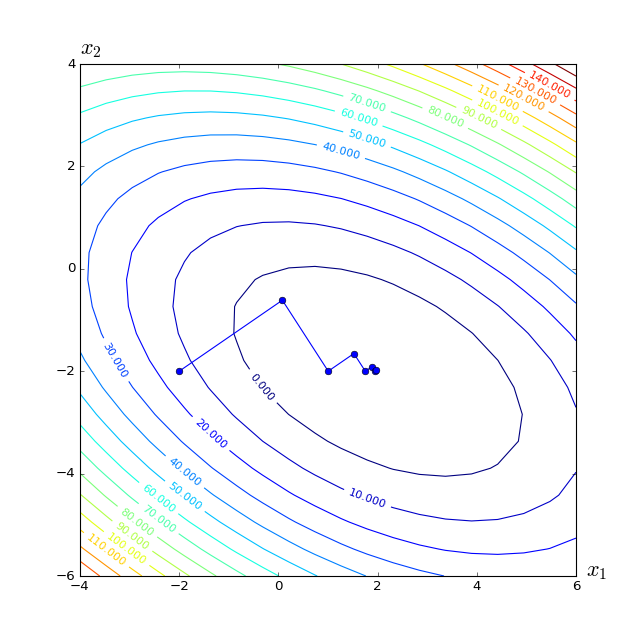

In [5]:
fig8(A, b, c)

<center>Figure 8: Here, the method of Steepest Descent starts at $[-2, -2]^T$ and converges at $[2, -2]^T$.</center>

Putting it all together, the method of Steepest Descent is:

\begin{align}
r_{[i]} &= b - Ax_{[i]}, \tag{10} \\
\alpha_{[i]} &= \frac{r_{[i]}^Tr_{[i]}}{r_{[i]}^TAr_{[i]}}, \tag{11} \\
x_{[i+1]} &= x_{[i]} + \alpha_{[i]}r_{[i]}. \tag{12}
\end{align}

The example is run until it converges in Figure 8. Note the zigzag path, which appears because each gradient is orthogonal to the previous gradient.

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
<span style="color:#228">
<H3>Steepest Descent vs Gradient Descent</H3>

<p>If, instead of computing $\alpha$ for an optimal line search at each iteration, we simply fix $\alpha$ at some small value and hope for the best, the method is called Gradient Descent. It reduces the number of products that need to be calculated at each iteration, but typically increases the number of iterations needed to converge. The user now needs to pick a value for $\alpha$: too large and the iterations will diverge; too small and convergence to $x$ will be slower than necessary, and can become too slow to be practical.

<p>Below I have added another interactive figure for you to explore Steepest Descent and Gradient Descent. The only difference between the two methods is that in Steepest Descent 'alpha' is calculated as in equation (11), whereas in Gradient Descent the value is taken from the 'alpha' slider.

<IPython.core.display.Javascript object>


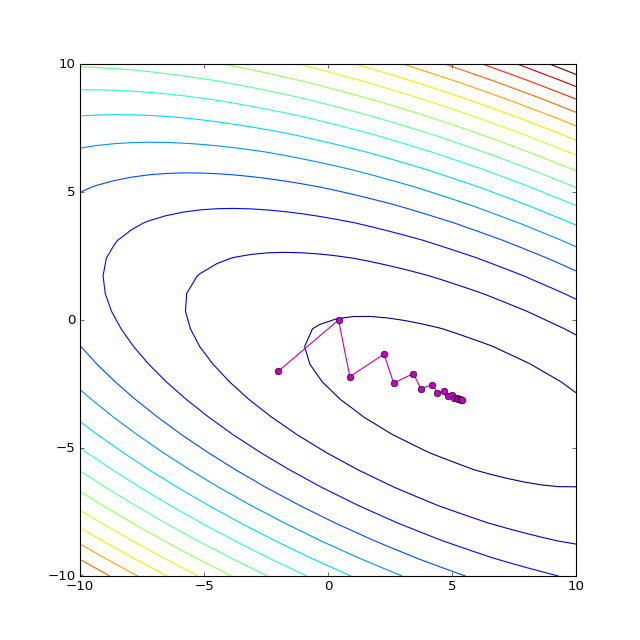

In [6]:
axB = fig_B()

In [7]:
sliders_figB(axB)

<html>
<hr style="height:2px;border:none;color:#228;background-color:#228;" />
</html>

The algorithm in equations (10)-(12) requires two matrix-vector multiplications per iteration. The computational cost of Steepest Descent is dominated by matrix-vector products; fortunately, one can be eliminated. By premultiplying both sides of Equation 12 by $-A$ and adding $b$, we have

\begin{equation}
r_{[i+1]} = r_{[i]} - \alpha_{[i]}Ar_{[i]}. \tag{13}
\end{equation}

Although Equation 10 is still needed to compute $r_{[0]})$, Equation 13 can be used for every iteration thereafter. The product $Ar,$ which occurs in both Equations 11 and 13, need only be computed once. The disadvantage of using this recurrence is that the sequence defined by Equation 13 is generated without any feedback from the value of $x_{[i]}$, so that accumulation of floating point roundoff error may cause $x_{[i]}$ to converge to some point near $x$. This effect can be avoided by periodically using Equation 10 to recompute the correct residual.

Before analyzing the convergence of Steepest Descent, I must digress to ensure that you have a solid understanding of eigenvectors.

Next: [5. Thinking with Eigenvectors and Eigenvalues](CG05.ipynb)